# Labb 3 - Linjär klassificering 
## Syfte
Målet var att klassificera punkter med en linje y=kx+m och jämföra med tre givna linjer.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("unlabelled_data.csv", delimiter=",")
X = data[:,0]; Y = data[:,1]

def classify_point(x,y,k,m):
    return 0 if y < (k*x + m) else 1

#Min linje (robust mittlinje)
k = 0.0
m = float(np.median(Y - k*X))
labels = np.array([classify_point(x,y,k,m) for x,y in zip(X,Y)])

print(f"Min linje: y = {k}x + {m}")
print("klass0:", (labels==0).sum(), "klass1:", (labels==1).sum(),
      "andel klass1:", labels.mean()*100, "%")


Min linje: y = 0.0x + -0.009967776478199353
klass0: 300 klass1: 300 andel klass1: 50.0 %


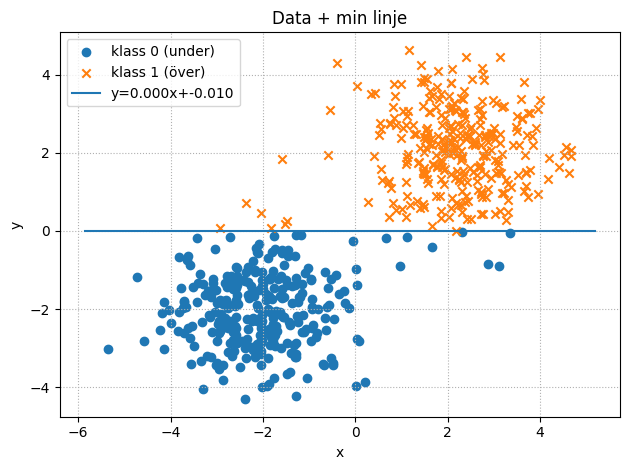

In [9]:
plt.figure()
plt.scatter(X[labels==0], Y[labels==0], marker="o", label="klass 0 (under)")
plt.scatter(X[labels==1], Y[labels==1], marker="x", label="klass 1 (över)")
xs = np.linspace(X.min()-0.5, X.max()+0.5, 200)
ys = k*xs + m
plt.plot(xs, ys, label=f"y={k:.3f}x+{m:.3f}")
plt.title("Data + min linje"); plt.xlabel("x"); plt.ylabel("y")
plt.grid(True, linestyle=":"); plt.legend(); plt.tight_layout(); plt.show()

## Jämförelse med givna linjer
Vi jämför med:
- f(x)=0.489x
- g(x)=-2x+0.16
- h(x)=800x-120

In [11]:
lines = [(0.489, 0.0, "f(x)=0.489"),
         (-2.0, 0.16, "g(x)=-2x+0.16"),
         (800.0, 120.0, "h(x)=800x-120")]

def classify_all(k,m):
    return np.array([classify_point(x,y,k,m) for x,y in zip(X,Y)])

for kk, mm, name in lines:
    lbls = classify_all(kk, mm)
    same = np.mean(lbls == labels) * 100
    print(f"{name} -> {same:.1f}% överensstämmer med min linje")

f(x)=0.489 -> 82.5% överensstämmer med min linje
g(x)=-2x+0.16 -> 97.5% överensstämmer med min linje
h(x)=800x-120 -> 4.3% överensstämmer med min linje


## Diskussion 
- Min linje gav en blanserad 50/50 uppdelning (klass0=300, klass1=300) med \(m \approx -0.010\).
- g(x) matchade bäst (~97.5%), f(x) var medel (~82.5%), h(x) avvek kraftig (~4.3%).
- Slutsats: en robust mittlinje är stabilare än en nästan vertikal linje.